In [ ]:
import importlib
import autovc as autovc
import numpy as np
import pickle
import tensorflow as tf

## Experiment with meta data from autovc repo

In [ ]:
with open('metadata.pkl', 'rb') as f:
    data = pickle.load(f)
# data = np.array(data)
mel_specs, sp_emb = [], [] 
for d in data:
    sp_emb.append(d[1])
    print(d[2].shape)
    mel_specs.append(d[2])
mel_specs = np.array(mel_specs)
sp_emb = np.array(sp_emb).astype('float32')

(90, 80)
(89, 80)
(75, 80)
(109, 80)
ipykernel_launcher:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
sp_emb.shape

(4, 256)

In [ ]:
mel_specs.shape

(4,)

In [ ]:
padded_mel_specs = tf.keras.preprocessing.sequence.pad_sequences(mel_specs, padding="post", dtype='float32',value=-1.0, maxlen=128, truncating="post")

## Test Encoder with Functional API 

In [ ]:
padded_mel_specs.shape

(4, 128, 80)

In [ ]:
sp_emb.shape

(4, 256)

In [ ]:
importlib.reload(autovc)
encoder = autovc.Encoder()
codes = encoder(padded_mel_specs, sp_emb)

In [ ]:
tf.shape(codes)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 4, 16, 32])>

In [ ]:
codes.shape

TensorShape([16, 4, 32])

In [ ]:
tf.keras.layers.UpSampling1D(8)(codes).shape

TensorShape([4, 128, 32])

## Test UpSampling with Functional API

In [ ]:
importlib.reload(autovc)
upsample = autovc.UpSampling()
output = upsample(codes, sp_emb)

In [ ]:
output.shape

TensorShape([4, 128, 288])

## Test Decoder with Functional API 

In [ ]:
importlib.reload(autovc)
decoder = autovc.Decoder()
mel_decoder = decoder(output)

In [ ]:
mel_decoder.shape

TensorShape([4, 128, 80])

## Test Posnet with Functional API

In [ ]:
importlib.reload(autovc)
postnet = autovc.PostNet()
mel_postnet = postnet(mel_decoder)

In [ ]:
mel_postnet.shape

TensorShape([4, 128, 80])

# Test End2End AUTOVC 

In [ ]:
importlib.reload(autovc)
model = autovc.AutoVC()
model.compile(optimizer="Adam")
model.fit(x=(padded_mel_specs, sp_emb, sp_emb), epochs=3)

Epoch 1/3
1/1 [==============================] - 42s 42s/step - loss_net: 0.9469 - loss_cd: 4.2460e-04
Epoch 2/3
1/1 [==============================] - 13s 13s/step - loss_net: 1.0962 - loss_cd: 0.0010
Epoch 3/3
1/1 [==============================] - 12s 12s/step - loss_net: 1.0176 - loss_cd: 5.5392e-04


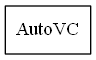

In [ ]:
importlib.reload(autovc)
model = autovc.AutoVC()
model.compile(optimizer="Adam")


In [ ]:
# model.build(input_shape=[(128,80), (256,)])

In [ ]:
mel_post = model(padded_mel_specs, sp_emb, sp_emb)

In [ ]:
mel_post.shape

TensorShape([4, 128, 80])

In [ ]:
model.summary()

Model: "AutoVC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  3008256   
_________________________________________________________________
decoder_20 (Decoder)         multiple                  26529360  
_________________________________________________________________
postnet (PostNet)            multiple                  5665680   
_________________________________________________________________
upsampling (UpSampling)      multiple                  0         
Total params: 35,203,296
Trainable params: 35,191,872
Non-trainable params: 11,424
_________________________________________________________________


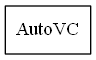

In [ ]:
tf.keras.utils.plot_model(model, "model.png")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!nvidia-smi

Sun May  2 20:12:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "KTH/Speech and Speaker Recognition/AUTOVC/"
os.chdir(root_dir + project_folder)


In [4]:
import importlib
import model.autovc as autovc
import numpy as np
import pickle
import tensorflow as tf

In [5]:
with open('model/metadata.pkl', 'rb') as f:
    data = pickle.load(f)
# data = np.array(data)
mel_specs, sp_emb = [], [] 
for d in data:
    sp_emb.append(d[1])
    print(d[2].shape)
    mel_specs.append(d[2])
mel_specs = np.array(mel_specs)
sp_emb = np.array(sp_emb).astype('float32')

(90, 80)
(89, 80)
(75, 80)
(109, 80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [6]:
padded_mel_specs = tf.keras.preprocessing.sequence.pad_sequences(mel_specs, padding="post", dtype='float32',value=-1.0, maxlen=128, truncating="post")

In [13]:
importlib.reload(autovc)
model = autovc.AutoVC()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer)
model.fit(x=(padded_mel_specs, sp_emb, sp_emb), epochs=200)

Epoch 1/200
1/1 [==============================] - 16s 16s/step - loss_net: 0.9468 - loss_cd: 3.2184e-04
Epoch 2/200
1/1 [==============================] - 0s 224ms/step - loss_net: 0.9465 - loss_cd: 3.2215e-04
Epoch 3/200
1/1 [==============================] - 0s 222ms/step - loss_net: 0.9461 - loss_cd: 3.2507e-04
Epoch 4/200
1/1 [==============================] - 0s 221ms/step - loss_net: 0.9458 - loss_cd: 3.2998e-04
Epoch 5/200
1/1 [==============================] - 0s 219ms/step - loss_net: 0.9455 - loss_cd: 3.3642e-04
Epoch 6/200
1/1 [==============================] - 0s 221ms/step - loss_net: 0.9450 - loss_cd: 3.4375e-04
Epoch 7/200
1/1 [==============================] - 0s 217ms/step - loss_net: 0.9445 - loss_cd: 3.5159e-04
Epoch 8/200
1/1 [==============================] - 0s 222ms/step - loss_net: 0.9440 - loss_cd: 3.5977e-04
Epoch 9/200
1/1 [==============================] - 0s 224ms/step - loss_net: 0.9433 - loss_cd: 3.6840e-04
Epoch 10/200
1/1 [=============================